## Imports

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from minepy import MINE
from scipy.stats import pearsonr,spearmanr,describe
from scipy.spatial.distance import pdist, squareform
import numpy as np
import copy
import dcor
sns.set()

##  Pearson’s Correlation Coefficient

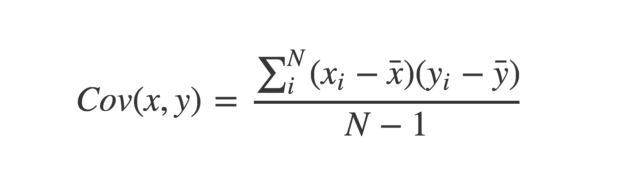

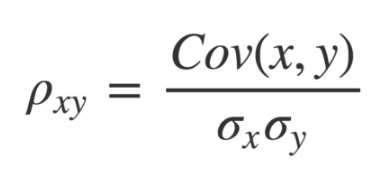

#### Generate Data

In [57]:
np.random.seed(1077939816)
sample_size = 100
noise_mean = 0
noise_std = 1

theta = np.random.randn(2)
x_1 = np.random.randn(sample_size)*10
y_1 = theta[0]*x_1+theta[1]
y_1_noise = y_1 + np.random.normal(noise_mean,noise_std,size = sample_size).T


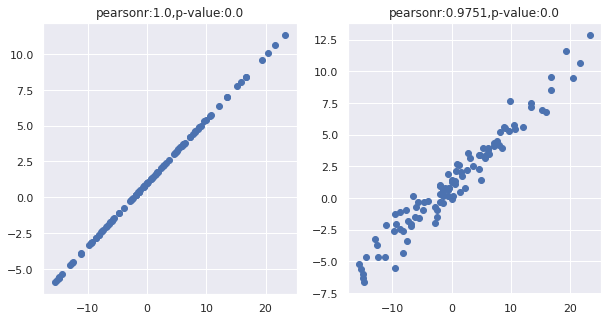

In [58]:
ro_1, p_1 = pearsonr(x_1,y_1)
ro_2, p_2 = pearsonr(x_1,y_1_noise)
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (10,5))
axs.flat[0].scatter(x_1,y_1)
axs.flat[0].set_title("pearsonr:{0},p-value:{1}".format(np.round(ro_1,4),np.round(p_1,4)))
axs.flat[1].scatter(x_1,y_1_noise)
axs.flat[1].set_title("pearsonr:{0},p-value:{1}".format(np.round(ro_2,4),np.round(p_2,4)));

In [59]:
np.random.seed(15)

x_2 = np.random.rand(sample_size)*5
y_2_cuadr = x_2**2 + np.random.normal(noise_mean,noise_std,size = sample_size)
y_2_sin = np.sin(x_2) + np.random.normal(noise_mean,noise_std,size = sample_size)
y_2_log = np.log(x_2) + np.random.normal(noise_mean,noise_std-0.5,size = sample_size)


#### Calculate pearsonr and plot

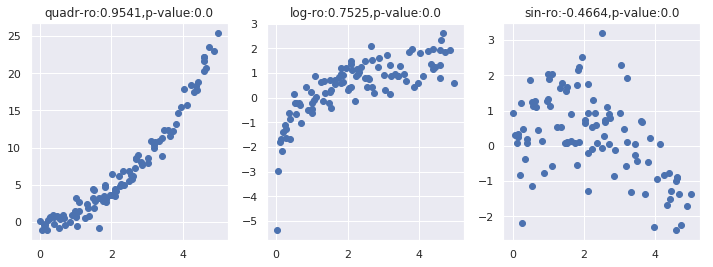

In [60]:
ro_0, p_0 = pearsonr(x_2,y_2_cuadr)
ro_1, p_1 = pearsonr(x_2,y_2_log)
ro_2, p_2 = pearsonr(x_2,y_2_sin)
fig, axs = plt.subplots(nrows=1, ncols=3,figsize = (12,4))
axs.flat[0].scatter(x_2,y_2_cuadr)
axs.flat[0].set_title("quadr-ro:{0},p-value:{1}".format(np.round(ro_0,4),np.round(p_0,4)))
axs.flat[1].scatter(x_2,y_2_log)
axs.flat[1].set_title("log-ro:{0},p-value:{1}".format(np.round(ro_1,4),np.round(p_1,4)))
axs.flat[2].scatter(x_2,y_2_sin);
axs.flat[2].set_title("sin-ro:{0},p-value:{1}".format(np.round(ro_2,4),np.round(p_2,4)));

### Spearman correlation

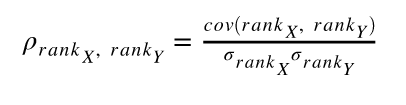

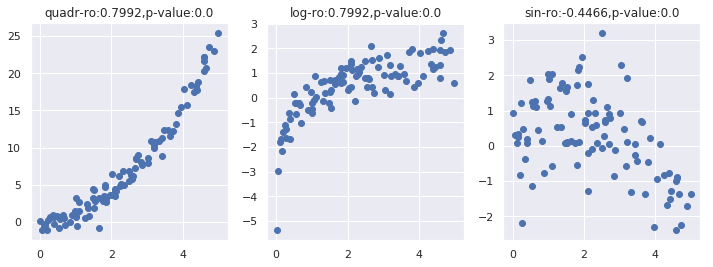

In [61]:
ro_0, p_0 = spearmanr(x_2,y_2_log)
ro_1, p_1 = spearmanr(x_2,y_2_log)
ro_2, p_2 = spearmanr(x_2,y_2_sin)

fig, axs = plt.subplots(nrows=1, ncols=3,figsize = (12,4))

axs.flat[0].scatter(x_2,y_2_cuadr)
axs.flat[0].set_title("quadr-ro:{0},p-value:{1}".format(np.round(ro_0,4),np.round(p_0,4)))
axs.flat[1].scatter(x_2,y_2_log)
axs.flat[1].set_title("log-ro:{0},p-value:{1}".format(np.round(ro_1,4),np.round(p_1,4)))
axs.flat[2].scatter(x_2,y_2_sin);
axs.flat[2].set_title("sin-ro:{0},p-value:{1}".format(np.round(ro_2,4),np.round(p_2,4)));

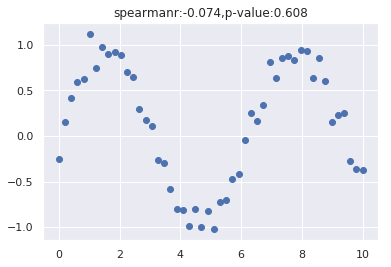

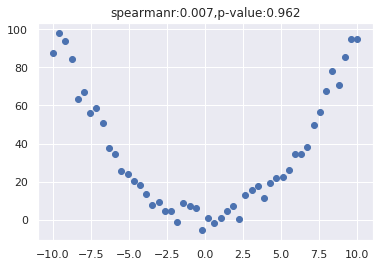

In [62]:
x = np.linspace(0,10)
y = np.sin(x) + np.random.normal(0,0.1,50)
r, p = spearmanr(x,y)
plt.scatter(x,y)
plt.title("spearmanr:{0},p-value:{1}".format(np.round(r,3),np.round(p,3)));
plt.show()

x = np.linspace(-10,10)
y = x**2 + np.random.normal(0,5,50)
r, p = spearmanr(x,y)
plt.scatter(x,y)
plt.title("spearmanr:{0},p-value:{1}".format(np.round(r,3),np.round(p,3)));

### Distance Correlation

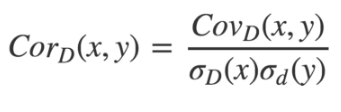

In [63]:
def distcorr(Xval, Yval, pval=True, nruns=2000):
    """ Compute the distance correlation function, returning the p-value.
    Based on Satra/distcorr.py (gist aa3d19a12b74e9ab7941)
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    (0.76267624241686671, 0.404)
    """
    X = np.atleast_1d(Xval)
    Y = np.atleast_1d(Yval)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()

    dcov2_xy = (A * B).sum() / float(n * n)
    dcov2_xx = (A * A).sum() / float(n * n)
    dcov2_yy = (B * B).sum() / float(n * n)
    dcor = np.sqrt(dcov2_xy) / np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))

    if pval:
        greater = 0
        for i in range(nruns):
            Y_r = copy.copy(Yval)
            np.random.shuffle(Y_r)
            if distcorr(Xval, Y_r, pval=False) >= dcor:
                greater += 1
        return (dcor, greater / float(nruns))
    else:
        return dcor

def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]
    if pval:
        return (dc, pv)
    else:
        return dc

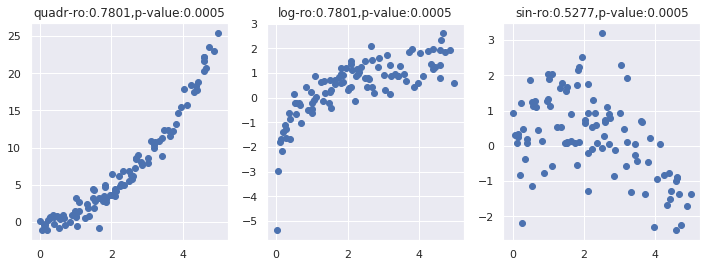

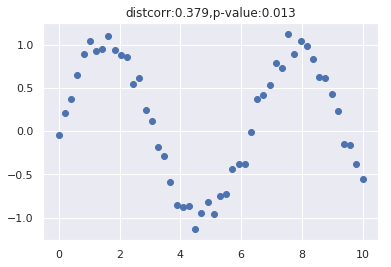

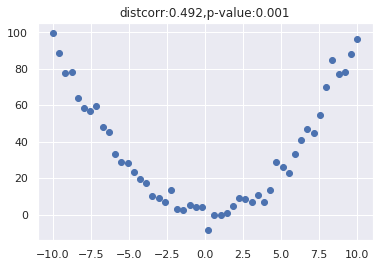

In [64]:
ro_0, p_0 = dist_corr(x_2,y_2_log)
ro_1, p_1 = dist_corr(x_2,y_2_log)
ro_2, p_2 = dist_corr(x_2,y_2_sin)
fig, axs = plt.subplots(nrows=1, ncols=3,figsize = (12,4))
axs.flat[0].scatter(x_2,y_2_cuadr)
axs.flat[0].set_title("quadr-ro:{0},p-value:{1}".format(np.round(ro_0,4),np.round(p_0,4)))
axs.flat[1].scatter(x_2,y_2_log)
axs.flat[1].set_title("log-ro:{0},p-value:{1}".format(np.round(ro_1,4),np.round(p_1,4)))
axs.flat[2].scatter(x_2,y_2_sin);
axs.flat[2].set_title("sin-ro:{0},p-value:{1}".format(np.round(ro_2,4),np.round(p_2,4)))
plt.show()
x = np.linspace(0,10)
y = np.sin(x) + np.random.normal(0,0.1,50)
r, p = dist_corr(x,y)
plt.scatter(x,y)
plt.title("distcorr:{0},p-value:{1}".format(np.round(r,3),np.round(p,3)));
plt.show()

x = np.linspace(-10,10)
y = x**2 + np.random.normal(0,5,50)
r, p = dist_corr(x,y)
plt.scatter(x,y)
plt.title("distcorr:{0},p-value:{1}".format(np.round(r,3),np.round(p,3)));

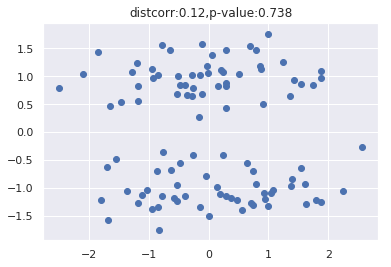

In [69]:
from sklearn.datasets import make_classification
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
d,p = dist_corr(X1[:,0],X1[:,1])
plt.scatter(X1[:,0],X1[:,1])
plt.title("distcorr:{0},p-value:{1}".format(np.round(d,3),np.round(p,3)));

### Maximum Information Coefficient

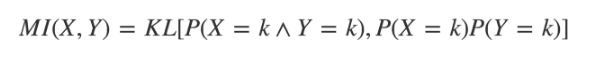

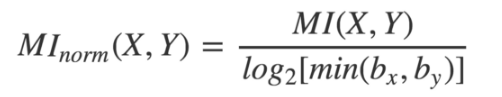

In [70]:
def mic(X,Y,pval=True,nruns=100):
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(X,Y)
    mic = mine.mic()
    if pval:
        greater = 0
        for i in range(nruns):
            Y_r = copy.copy(Y)
            np.random.shuffle(Y_r)
            mine.compute_score(X,Y_r)
            cur_mine = mine.mic()
            if cur_mine >= mic:
                greater += 1
        return (mic, greater / float(nruns))
    else:
        return mic

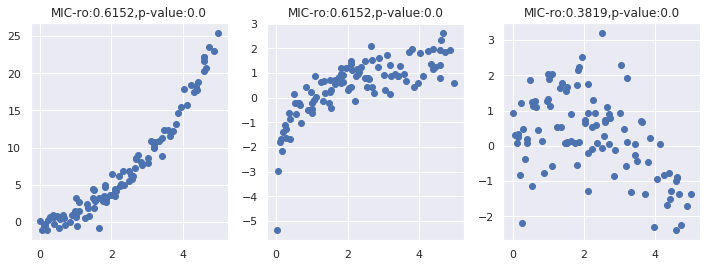

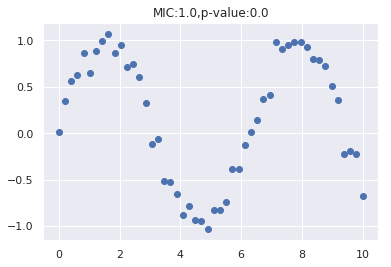

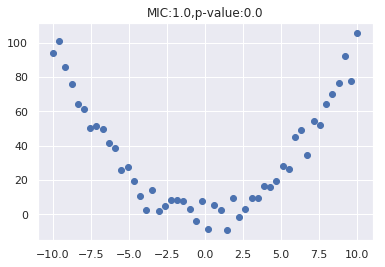

In [71]:
ro_0, p_0 = mic(x_2,y_2_log)
ro_1, p_1 = mic(x_2,y_2_log)
ro_2, p_2 = mic(x_2,y_2_sin)
fig, axs = plt.subplots(nrows=1, ncols=3,figsize = (12,4))
axs.flat[0].scatter(x_2,y_2_cuadr)
axs.flat[0].set_title("MIC-ro:{0},p-value:{1}".format(np.round(ro_0,4),np.round(p_0,4)))
axs.flat[1].scatter(x_2,y_2_log)
axs.flat[1].set_title("MIC-ro:{0},p-value:{1}".format(np.round(ro_1,4),np.round(p_1,4)))
axs.flat[2].scatter(x_2,y_2_sin);
axs.flat[2].set_title("MIC-ro:{0},p-value:{1}".format(np.round(ro_2,4),np.round(p_2,4)))
plt.show()
x = np.linspace(0,10)
y = np.sin(x) + np.random.normal(0,0.1,50)
r, p = mic(x,y)
plt.scatter(x,y)
plt.title("MIC:{0},p-value:{1}".format(np.round(r,3),np.round(p,3)));
plt.show()

x = np.linspace(-10,10)
y = x**2 + np.random.normal(0,5,50)
r, p = mic(x,y)
plt.scatter(x,y)
plt.title("MIC:{0},p-value:{1}".format(np.round(r,3),np.round(p,3)));

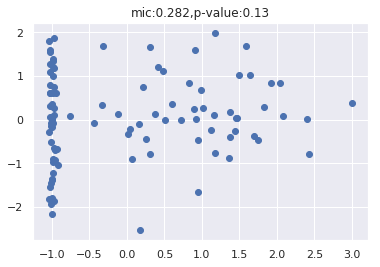

In [72]:
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
d,p = mic(X1[:,0],X1[:,1])
plt.scatter(X1[:,0],X1[:,1])
plt.title("mic:{0},p-value:{1}".format(np.round(d,3),np.round(p,3)));